In [4]:
# Imports

import os
import time

import pickle
import numpy as np
import scipy.stats as sp_stats

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

import random

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.externals import joblib


KL Divergence (X,Y) = 0.089 and (Y,X) = 0.141


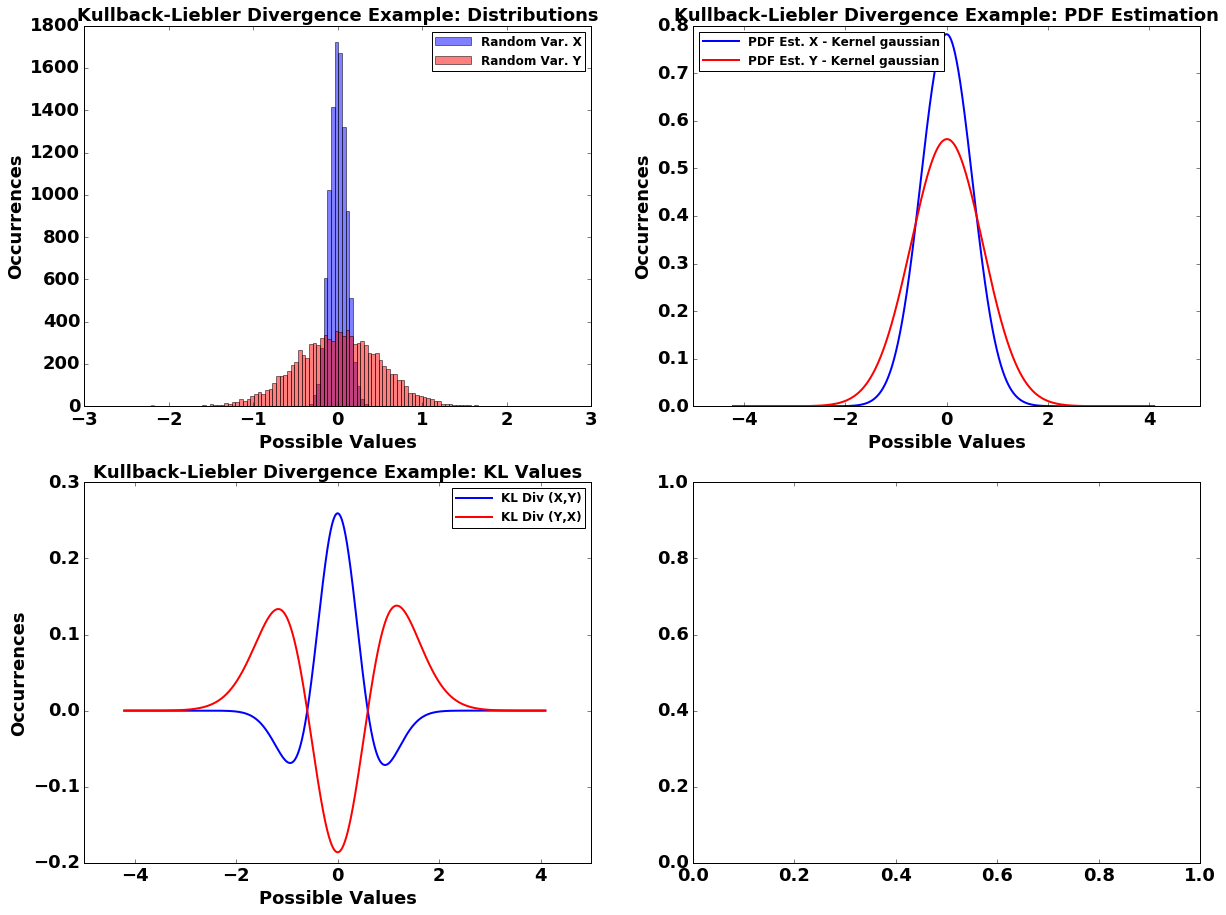

In [71]:
# KL Example and PDF Estimation


from sklearn.neighbors import KernelDensity

mean_x = 0.0#+1.5
mean_y = 0.0#-1.5
var_y = 0.5
var_x = 0.1

n_events = 10000

x = var_x*np.random.randn(n_events,1)+mean_x
y = var_y*np.random.randn(n_events,1)+mean_y

fig, subplot_array = plt.subplots(nrows=2, ncols=2,figsize=(20,15))

m_min = np.min([np.min(x),np.min(y)])
m_max = np.max([np.max(x),np.max(y)])

m_bins = np.linspace(m_min, m_max,100)

# plot variables
color_x = 'b'
color_y = 'r'
ax = plt.subplot(2,2,1)
n1, bins, patches = plt.hist(x,bins=m_bins,fc=color_x,alpha=0.5,label='Random Var. X')
n2, bins, patches = plt.hist(y,bins=m_bins,fc=color_y,alpha=0.5,label='Random Var. Y')

m_fontsize = 18
plt.title('Kullback-Liebler Divergence Example: Distributions', fontsize= m_fontsize, fontweight="bold")
plt.xlabel('Possible Values', fontsize= m_fontsize, fontweight="bold")
plt.ylabel('Occurrences', fontsize= m_fontsize, fontweight="bold")

plt.legend(loc='best')

# plot PDF Estimations
ax = plt.subplot(2,2,2)
plt.title('Kullback-Liebler Divergence Example: PDF Estimation', fontsize= m_fontsize, fontweight="bold")
plt.xlabel('Possible Values', fontsize= m_fontsize, fontweight="bold")
plt.ylabel('Occurrences', fontsize= m_fontsize, fontweight="bold")


kernel = 'gaussian' # other kernels: 'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'
kde_x = KernelDensity(kernel=kernel, bandwidth=0.5).fit(x)
kde_y = KernelDensity(kernel=kernel, bandwidth=0.5).fit(y)

X_plot = np.linspace(np.min([x.min(),y.min()])-2.0, np.max([x.max(), y.max()])+2.0, n_events)[:, np.newaxis]
log_dens_x = kde_x.score_samples(X_plot)
log_dens_y = kde_y.score_samples(X_plot)

ax.plot(X_plot[:, 0], np.exp(log_dens_x),color=color_x,label='PDF Est. X - Kernel %s'%(kernel))
ax.plot(X_plot[:, 0], np.exp(log_dens_y),color=color_y,label='PDF Est. Y - Kernel %s'%(kernel))

plt.legend(loc='best')

# plot KL Divergence Values
ax = plt.subplot(2,2,3)
plt.title('Kullback-Liebler Divergence Example: KL Values', fontsize= m_fontsize, fontweight="bold")
plt.xlabel('Possible Values', fontsize= m_fontsize, fontweight="bold")
plt.ylabel('Occurrences', fontsize= m_fontsize, fontweight="bold")

kl_xy = np.exp(log_dens_x)*np.log(np.exp(log_dens_x)/np.exp(log_dens_y))
kl_yx = np.exp(log_dens_y)*np.log(np.exp(log_dens_y)/np.exp(log_dens_x))

ax.plot(X_plot[:, 0], kl_xy,color=color_x,label='KL Div (X,Y)')
ax.plot(X_plot[:, 0], kl_yx,color=color_y,label='KL Div (Y,X)')

plt.legend(loc='best')

# Show KL values

kl_value_xy = sp_stats.entropy(np.exp(log_dens_x),np.exp(log_dens_y))
kl_value_yx = sp_stats.entropy(np.exp(log_dens_y),np.exp(log_dens_x))

print 'KL Divergence (X,Y) = %1.3f and (Y,X) = %1.3f'%(kl_value_xy,kl_value_yx)


In [62]:
kl_value_xy

inf